In [1]:
!nvidia-smi

Wed Feb 27 12:24:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.73       Driver Version: 410.73       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 40%   45C    P8    N/A /  N/A |     26MiB /  4034MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 760     Off  | 00000000:06:00.0 N/A |                  N/A |
| 40%   44C    P8    N/A /  N/A |      1MiB /  4037MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [3]:
import os
import sys
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
sys.path.append("../")

In [5]:
from UNet_inverted_dice import get_unet

Using TensorFlow backend.


In [6]:
%matplotlib inline

In [7]:
# ih_data dir
data_dir = "/data/uob/Jordan/"
# deepthought_data_dir
#data_dir = "/storage/yw18581/data"

In [8]:
## Loading data
print("Loading data")

Loading data


In [9]:
X_test = np.load(os.path.join(data_dir,"Xy_test.npz"))

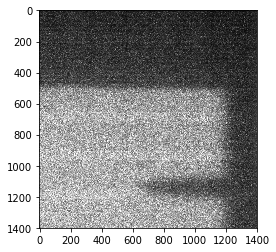

In [10]:
plt.imshow(X_test["x"][0][...,0],cmap='gray')

In [11]:
from keras.models import load_model
from UNet import get_unet

# UNet, 100 epochs, dice coeff with -, adam

In [13]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet.hdf5')

In [25]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [26]:
pred.shape

(1, 1400, 1400, 1)

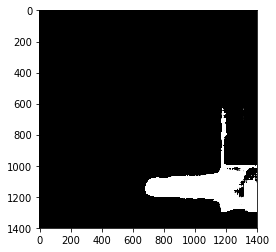

In [27]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 100 epochs, dice coeff with 1-, adam

In [29]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_100epochs_inv_dice.hdf5')

In [30]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [31]:
pred.shape

(1, 1400, 1400, 1)

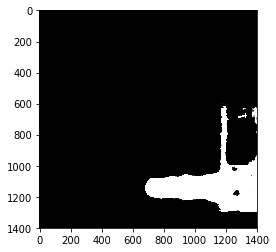

In [32]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, adam

In [34]:
model = get_unet()
model.load_weights("/data/uob/trained_models/trained_UNet_200epochs.hdf5")

In [35]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [36]:
pred.shape

(1, 1400, 1400, 1)

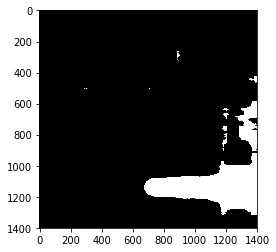

In [37]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, rmsprop

In [38]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_200epochs_rmsprop.hdf5')

In [39]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [40]:
pred.shape

(1, 1400, 1400, 1)

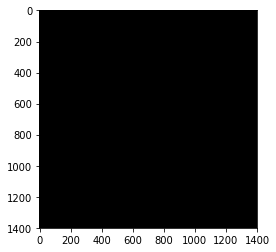

In [41]:
plt.imshow(pred[0,...,0],cmap='gray')

In [ ]:
model = get_unet()


In [42]:
model.load_weights('/data/uob/trained_models/trained_UNet_50epochs.hdf5')

In [43]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [44]:
pred.shape

(1, 1400, 1400, 1)

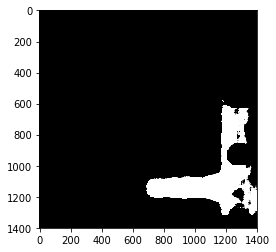

In [45]:
plt.imshow(pred[0,...,0],cmap='gray')

In [47]:
model = get_unet()

model.load_weights('/data/uob/trained_models/trained_UNet_500epochs.hdf5')

In [48]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

pred.shape

(1, 1400, 1400, 1)

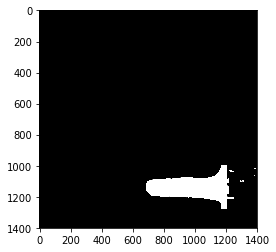

In [49]:
plt.imshow(pred[0,...,0],cmap='gray')

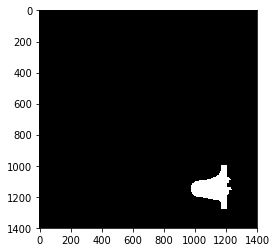

In [74]:
pred = model.predict(X_test["x"][1][np.newaxis,...])
plt.imshow(pred[0,...,0],cmap='gray')

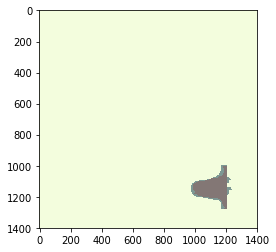

In [75]:
plt.imshow(X_test["y"][1],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.5)

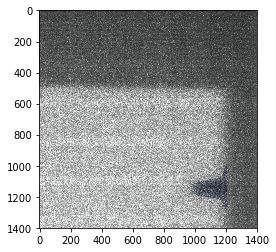

In [76]:
plt.imshow(X_test["x"][1][...,0],cmap='gray',alpha=1)
plt.imshow(X_test["y"][1],cmap='Blues',alpha=0.15)

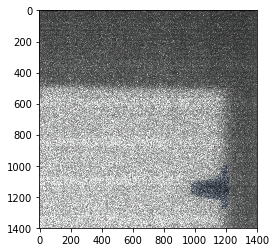

In [88]:
plt.imshow(X_test["x"][1][...,0],cmap='gray',alpha=1)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.15)

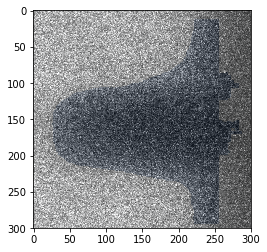

In [87]:
plt.imshow(X_test["x"][1][...,0][985:1285,950:1250],cmap='gray',alpha=1)
plt.imshow(pred[0,...,0][985:1285,950:1250],cmap='Blues',alpha=0.15)

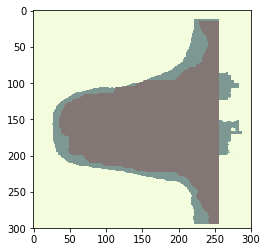

In [86]:
plt.imshow(X_test["y"][1][985:1285,950:1250],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0][985:1285,950:1250,],cmap='Blues',alpha=0.5)

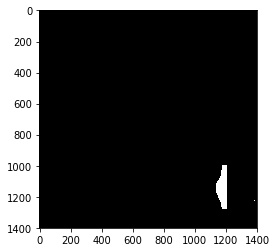

In [51]:
pred = model.predict(X_test["x"][2][np.newaxis,...])
plt.imshow(pred[0,...,0],cmap='gray')

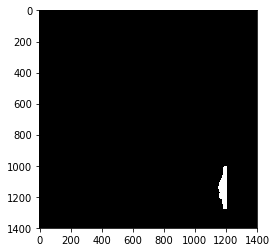

In [65]:
plt.imshow(X_test["y"][2],cmap='gray')

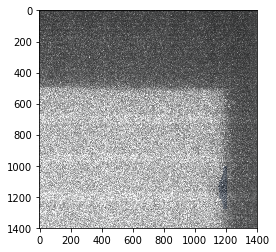

In [67]:
plt.imshow(X_test["x"][2][...,0],cmap='gray',alpha=1)
plt.imshow(X_test["y"][2],cmap='Blues',alpha=0.15)

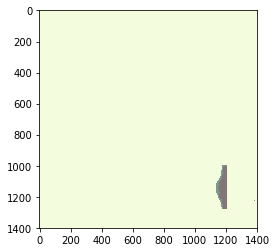

In [73]:
plt.imshow(X_test["y"][2],cmap='Wistia',alpha=0.5)
plt.imshow(pred[0,...,0],cmap='Blues',alpha=0.5)

In [12]:
model = get_unet()

model.load_weights('/data/uob/trained_models/retrained_UNet_500+250epochs.hdf5')


In [13]:
pred_ret = model.predict(X_test["x"][0][np.newaxis,...])

pred_ret.shape

(1, 1400, 1400, 1)

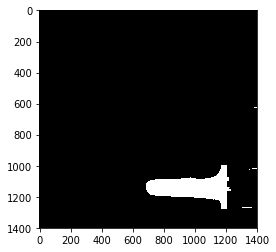

In [14]:
plt.imshow(pred_ret[0,...,0], cmap='gray')

In [15]:
model = get_unet()

model.load_weights('/data/uob/trained_models/retrained_UNet_500+250+250epochs.hdf5')



In [16]:
pred_ret2 = model.predict(X_test["x"][0][np.newaxis,...])

pred_ret2.shape

(1, 1400, 1400, 1)

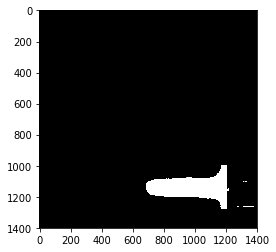

In [17]:
plt.imshow(pred_ret2[0,...,0], cmap='gray')

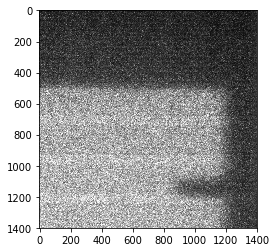

In [22]:
plt.imshow(imread("/data/uob/10x10_15mm_v2_8bit/File_0.tiff")[ROW_SLICE,COL_SLICE], cmap='gray')

In [23]:
img15 = imread("/data/uob/10x10_15mm_v2_8bit/File_0.tiff")[ROW_SLICE,COL_SLICE]

In [25]:
img15.shape

(1400, 1400)

In [26]:
pred15 = model.predict(img15[np.newaxis,...,np.newaxis])

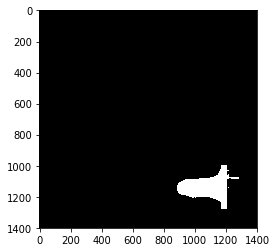

In [27]:
plt.imshow(pred15[0,...,0], cmap='gray')

In [28]:
img15double = imread("/data/uob/10x10_15mm_v2_8bit/File_0_double.tiff")[ROW_SLICE,COL_SLICE]

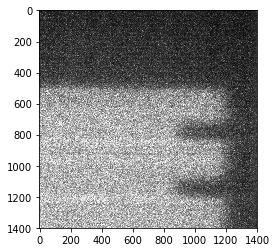

In [29]:
plt.imshow(img15double, cmap='gray')

In [31]:
pred15double = model.predict(img15double[np.newaxis,...,np.newaxis])

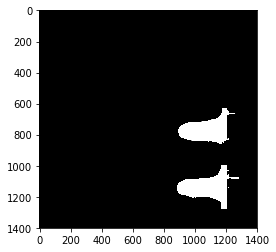

In [32]:
plt.imshow(pred15double[0,...,0], cmap='gray')